<a href="https://colab.research.google.com/github/GagraniV/WiDS2023/blob/main/VJ_WiDS_Feb072023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#!pip install pytorch-tabnet
#!pip install wget
#!pip install wandb
#import wandb
#!pip install optuna
#from pytorch_tabnet.tab_model import TabNetRegressor
#import optuna
#from optuna import Trial, visualization
#import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.5 MB/s eta 0:00:00


In [1]:
import numpy as np 
import pandas as pd 
from random import random
import csv
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Download complete and/or subset of the dataset. 
Upload dataset https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv')
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv')

In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv',nrows =1000)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv',nrows =1000)

In [2]:
np.random.seed(222)
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)

In [ ]:
with open('/content/drive/MyDrive/Kaggle2023/train_data.csv', 'r') as fin:
    reader = csv.reader(fin)
    rows = [l for l in reader if random() >= 0.99]
    trn_df = pd.DataFrame(rows)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to unmount
drive.flush_and_unmount()

In [ ]:
%cd drive/MyDrive/Kaggle2023
#trn_df= pd.read_csv('train_data.csv')

/content/drive/MyDrive/Kaggle2023


In [3]:
display(trn_df.head(n=5).style.set_caption('Train data'))

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [6]:
trn_df.filter(regex='^contest',axis=1).head()

,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-rhum-sig995-14d__rhum,contest-wind-h100-14d__wind-hgt-100,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500
0,232.52,31147.63,80.40,16621.35,26.414309,101330.27,1.82,98603.93,13.84,35.35,-4.10,47.77,1526.75,-3.20,5877.00
1,296.27,31089.40,70.52,16593.67,25.880598,101376.16,3.92,98642.46,12.78,26.47,-4.38,12.04,1529.62,-2.21,5880.70
2,203.79,31014.63,77.34,16564.07,24.003215,101653.56,1.21,98936.60,17.03,28.22,-3.15,19.03,1542.43,-4.06,5868.49
3,207.04,30981.00,77.51,16536.94,20.826005,101811.91,1.74,99068.87,25.45,28.72,-2.36,62.82,1546.07,-3.37,5856.56
4,200.77,30937.28,71.94,16466.38,14.335842,101998.37,1.28,99218.89,32.15,21.39,7.48,0.63,1532.88,-1.25,5818.76


In [ ]:
#file containing most recent monthly temprature NMME model forecasts for tmp2m 
trn_df.filter(regex = '^nmme0-tmp2m',axis=1).head(n =6)

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean
0,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
1,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
2,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
3,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
4,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
5,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46


In [7]:
trn_df.filter(regex = '^cancm30',axis=1).head(n =6)

,cancm30
0,29.02
1,29.02
2,26.87
3,26.87
4,22.82
5,22.82


In [6]:
print('Column count is: ', len(trn_df.columns))

Column count is:  246


In [5]:
print('Row count is:', len(trn_df))

Row count is: 18890


In [8]:
trn_df.shape

(18890, 246)

In [8]:
trn_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [ ]:
tst_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=245)

In [ ]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18652 entries, 0 to 18651
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 35.0+ MB


https://www.kaggle.com/competitions/widsdatathon2023/data

In [ ]:
trn_df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [ ]:
tst_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,...,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,391410.500000,0.592766,0.517964,299.244395,19.363234,21.195801,19.204389,20.140415,18.261659,20.396613,...,22.030820,-34.379016,25.485902,36.913279,-21.290328,10.448689,-12.676885,8.211967,-11.478033,21.083770
std,9051.264507,0.251748,0.272063,117.029504,7.310349,7.151861,7.146665,6.169318,5.539982,7.087798,...,30.914333,24.479350,30.720523,17.083142,22.336810,8.557387,29.438632,29.897845,18.660838,16.841297
min,375734.000000,0.000000,0.000000,32.820000,1.550000,2.900000,1.170000,3.530000,1.840000,0.080000,...,-19.900000,-76.450000,-29.250000,6.500000,-59.540000,-5.450000,-66.770000,-32.150000,-53.690000,-16.560000
25%,383572.250000,0.409091,0.300000,215.962500,14.060000,16.140000,14.440000,15.840000,14.660000,15.540000,...,2.220000,-56.070000,3.630000,19.570000,-39.340000,4.720000,-30.630000,-18.360000,-23.150000,13.420000
50%,391410.500000,0.590909,0.533333,292.915000,19.940000,21.720000,19.325000,20.150000,18.210000,20.340000,...,14.700000,-31.070000,22.740000,37.090000,-21.420000,10.660000,-22.640000,0.150000,-13.950000,21.090000
75%,399248.750000,0.818182,0.766667,371.330000,24.610000,26.810000,24.760000,24.890000,22.180000,25.730000,...,34.300000,-15.510000,44.690000,49.660000,-0.790000,17.090000,14.420000,28.840000,-0.470000,32.410000
max,407087.000000,1.000000,1.000000,740.170000,36.080000,36.030000,32.970000,33.910000,35.310000,37.420000,...,116.770000,25.330000,79.610000,71.270000,14.150000,29.000000,33.350000,74.130000,28.270000,51.450000


In [9]:
list(trn_df.select_dtypes(include='object'))

['startdate', 'climateregions__climateregion']

In [10]:
list(trn_df.select_dtypes(include='int64'))

['index', 'mjo1d__phase', 'mei__meirank', 'mei__nip']

In [12]:
trn_df.columns.to_series().groupby(trn_df.dtypes).count()

int64        4
float64    240
object       2
dtype: int64

In [24]:
#Object type columns 
trn_df.groupby(['climateregions__climateregion'])['startdate'].count().reset_index()


,climateregions__climateregion,startdate
0,BSh,241
1,BSk,7007
2,BWh,462
3,BWk,735
4,Cfa,2592
5,Cfb,207
6,Csa,493
7,Csb,2050
8,Dfa,1177
9,Dfb,2667


In [ ]:
countplot_features(trn_df, feature='climateregions__climateregion', title = "Frequency of "+ feature)

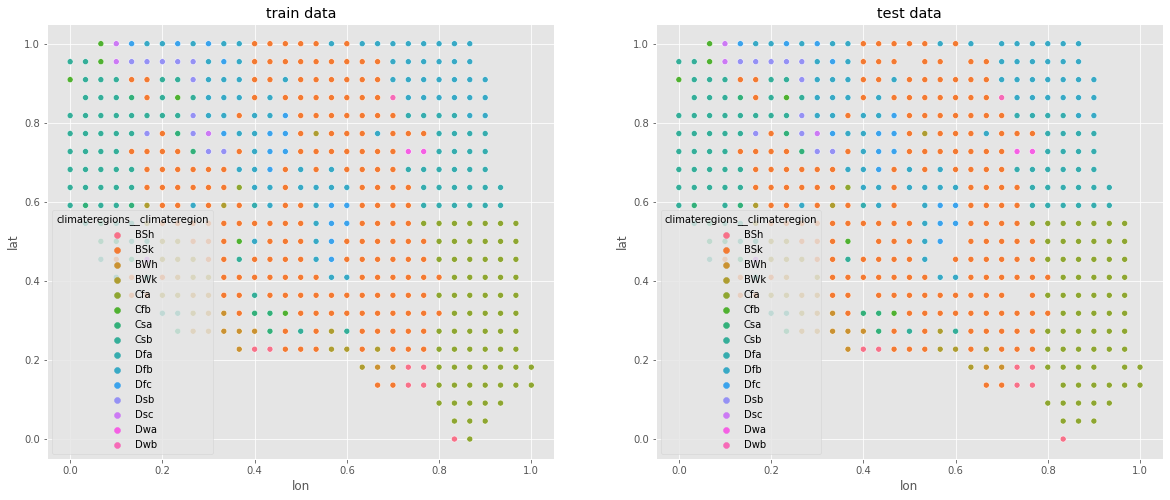

In [25]:
temp = trn_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[0])
ax[0].set_title('train data')
temp = tst_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[1])
ax[1].set_title('test data')
plt.show()

In [26]:
#Let's create a location feature from the lat/lon coordinates.
# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
#trn_df = all_df.iloc[:len(trn_df)]
#tst_df = all_df.iloc[len(trn_df):]

In [47]:
#convert into pandas datetime object
trn_df.startdate = pd.to_datetime(trn_df.startdate)
tst_df.startdate = pd.to_datetime(tst_df.startdate)
trn_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,21,0.0,0.833333,2014-09-22,228.88,29.02,31.64,29.57,30.73,29.71,...,33.33,-34.75,60.53,-2.06,-95.47,-28.73,-2.62,29.64,-7.34,-12.81
1,90,0.0,0.833333,2014-11-30,125.57,16.91,21.65,13.72,18.87,18.18,...,18.55,-54.57,21.29,-13.62,-5.38,43.90,-82.61,39.45,-10.79,32.60
2,108,0.0,0.833333,2014-12-18,131.22,16.91,21.65,13.72,18.87,18.18,...,61.31,18.02,-41.98,50.06,2.90,-28.77,31.75,6.15,12.90,14.58
3,200,0.0,0.833333,2015-03-20,287.96,11.51,14.92,13.85,15.48,14.01,...,48.77,23.64,-12.77,-11.22,-48.04,-39.29,12.04,28.86,-17.32,7.17
4,214,0.0,0.833333,2015-04-03,266.52,17.29,19.99,17.44,16.49,16.62,...,11.25,42.30,38.49,32.78,-49.57,-7.81,-16.75,-23.84,0.97,62.23


In [ ]:
# StartDate
print(min(trn_df.startdate), max(trn_df.startdate))

2014-09-01 00:00:00 2016-08-31 00:00:00


In [ ]:
trn_df.describe().style.background_gradient(cmap="Pastel1")

In [9]:
missing_columns = [col for col in trn_df.columns if trn_df[col].isnull().any()]
missingvalues_count =trn_df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")

,Null Values Count
nmme0-tmp2m-34w__ccsm30,784
nmme-tmp2m-56w__ccsm3,512
nmme-prate-34w__ccsm3,447
nmme0-prate-56w__ccsm30,773
nmme0-prate-34w__ccsm30,784
nmme-prate-56w__ccsm3,512
nmme-tmp2m-34w__ccsm3,447
ccsm30,773


In [50]:
trn_df = trn_df.dropna()

In [ ]:
#group start_date by month and check averages of the other columns
#trn_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()

contest-tmp2m-14d__tmp2m, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided

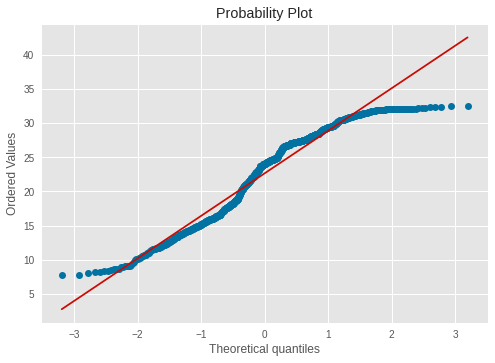

In [ ]:
res = stats.probplot(trn_df['contest-tmp2m-14d__tmp2m'], plot=plt)

Feature Engineering

In [48]:
trn_df['year']=pd.DatetimeIndex(trn_df['startdate']).year 
trn_df['month']=pd.DatetimeIndex(trn_df['startdate']).month 
trn_df['day']=pd.DatetimeIndex(trn_df['startdate']).day

tst_df['year']=pd.DatetimeIndex(tst_df['startdate']).year 
tst_df['month']=pd.DatetimeIndex(tst_df['startdate']).month 
tst_df['day']=pd.DatetimeIndex(tst_df['startdate']).day

# drop the startdate column from training and test dataset

trn_df=trn_df.drop(['startdate'], axis=1)
trn_df=trn_df.drop(['index'], axis=1)

tst_df=tst_df.drop(['startdate'], axis=1)
tst_df=tst_df.drop(['index'], axis=1)

In [ ]:
# check unique locations provided in the dataset

unique_trn_loc = trn_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_trn_loc.head()

,lat,lon,count
0,0.000000,0.833333,731
1,0.000000,0.866667,731
2,0.045455,0.833333,731
3,0.045455,0.866667,731
4,0.045455,0.900000,731


In [ ]:
# 514 unique location in the dataset
len(unique_trn_loc)

514

In [ ]:
unique_tst_loc = tst_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_tst_loc.head()

,lat,lon,count
0,0.000000,0.833333,61
1,0.000000,0.866667,61
2,0.045455,0.833333,61
3,0.045455,0.866667,61
4,0.045455,0.900000,61


In [ ]:
len(unique_tst_loc)

514

Location Feature and issue
 WiDS 2023: [link text](https://) different locations train/test SOLVED and found that this issue is caused due to rounding differences between training and test data.

In [29]:
scale = 14

trn_df.loc[:,'lat']=round(trn_df.lat,scale)
trn_df.loc[:,'lon']=round(trn_df.lon,scale)

tst_df.loc[:,'lat']=round(tst_df.lat,scale)
tst_df.loc[:,'lon']=round(tst_df.lon,scale)

# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

# Split back up
trn_df = all_df.iloc[:len(trn_df)]
tst_df = all_df.iloc[len(trn_df):]

print('Locations in train that are not in test')
print([c for c in trn_df.loc_group.unique() if c not in tst_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in tst_df.loc_group.unique() if c not in trn_df.loc_group.unique()])

Locations in train that are not in test
[1, 14, 30, 107, 117, 125, 130, 167, 190, 196, 239, 252, 477, 480, 507]
Locations in test that are not in train
[]


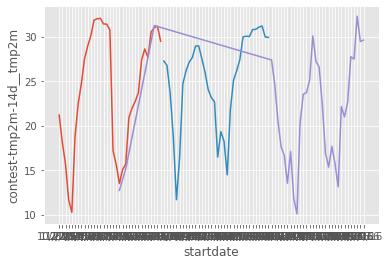

In [30]:
temp = trn_df[trn_df.loc_group == 0]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')
temp = trn_df[trn_df.loc_group == 1]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')

temp = trn_df[trn_df.loc_group == 2]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')